In [1]:
    NCORE = 3
    # NJOB = 10 ###  number of  parallel  jobs
    import pymisca.header as pyhead
    pyhead.mpl__setBackend('agg')
    # execfile(pyhead.base__file('headers/header__import.py'))
    import pymisca.jobs as pyjob
    import pymisca.callbacks as pycbk
    import pymisca.util as pyutil
    pd = pyutil.pd
    import pymisca.vis_util as pyvis
    import matplotlib.pyplot as plt
    figs = pyutil.collections.OrderedDict()
    
    import pymisca.ext as pyext
    pyext.base__check()
#     pyutil.shellexec('mkdir -p results/')
    
#     pyhead.check__base()

    def loadData():
        import sklearn.datasets as skdat
        data_digit = data = skdat.load_digits()
        din = data['data']
        data_digit.keys()
        y_true = data_digit['target']
        return din,y_true

    tdf,y_true = loadData()
    tdf = pd.DataFrame(tdf)

#     assert 0

env: OMP_NUM_THREADS=3
env: OPENBLAS_NUM_THREADS=3
env: MKL_NUM_THREADS=3
env: VECLIB_MAXIMUM_THREADS=3
env: NUMEXPR_NUM_THREADS=3


is in ipython: 1 
[WARN]No module named jinja2_util


[WARN] pymisca.vis_util cannot find network
[BASE]=/home/feng/repos/pymisca/test


/home/feng/.local/lib/python2.7/site-packages/pymisca/header.py:54: UserWarning:

[WARN] variable $BASE not set,defaulting to PWD:/home/feng/repos/pymisca/test



In [ ]:
import pymisca.numpy_extra as pynp
import pymisca.models as pymod
import numpy as np


tdfc = pynp.arr__sumNorm(tdf.values,axis=1)
mdl0 = pyjob.vmfMixture__anneal(tdfc,100, 250,K =30)
pycbk.qc__vmf__speed(mdl0)

mdl = mdl0.callback.mdls[75][-1]
clu = mdl.predictClu(tdfc,
                     entropy_cutoff = 2.2
                    )
pyutil.get_cluCount(clu)
cmat = pyvis.getConfusionMat(y_pred=clu.values.ravel(),y_true=y_true)
pyvis.heatmap(cmat)

[cbk]iter=0: beta=1.000E+02                         Cluster multiplexing
[iter]0,                    log_likelihood=-3.91
[iter]10,                    log_likelihood=31579.16
[iter]20,                    log_likelihood=33888.36
[iter]30,                    log_likelihood=37275.26
[iter]40,                    log_likelihood=40475.65


/home/feng/.local/lib/python2.7/site-packages/pandas/core/computation/check.py:17: UserWarning:

The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6




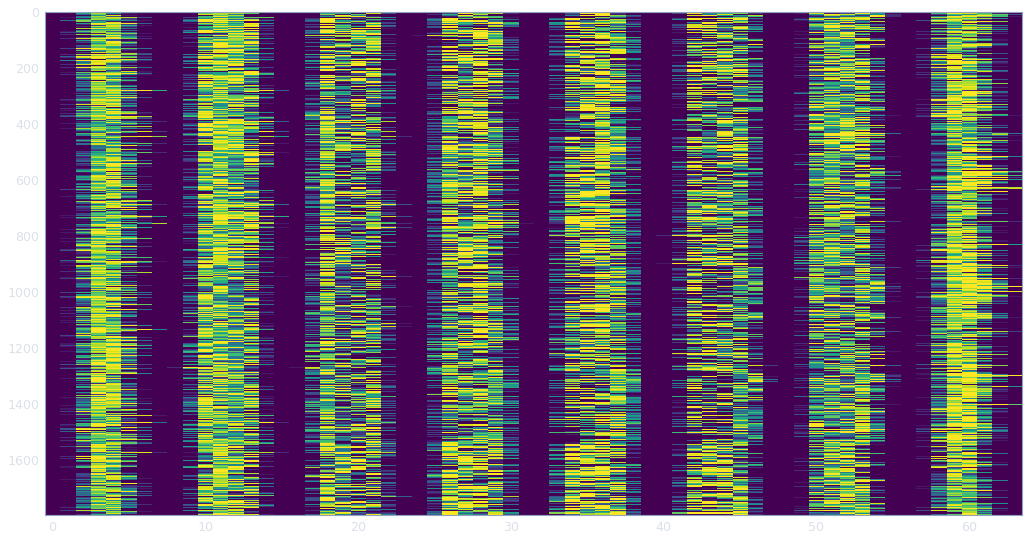

In [2]:
%matplotlib inline
pyvis.heatmap(tdf,figsize=[14,7])

59.674466698434806
2.8731171919879052e-36
2.791445846169297e-36
1.922165484236923e-36
1.5869206443233625e-36
1.6176113823337714e-36
1.507157759700371e-36
1.4412398043679494e-36
1.4212835473241481e-36
1.362534995489229e-36


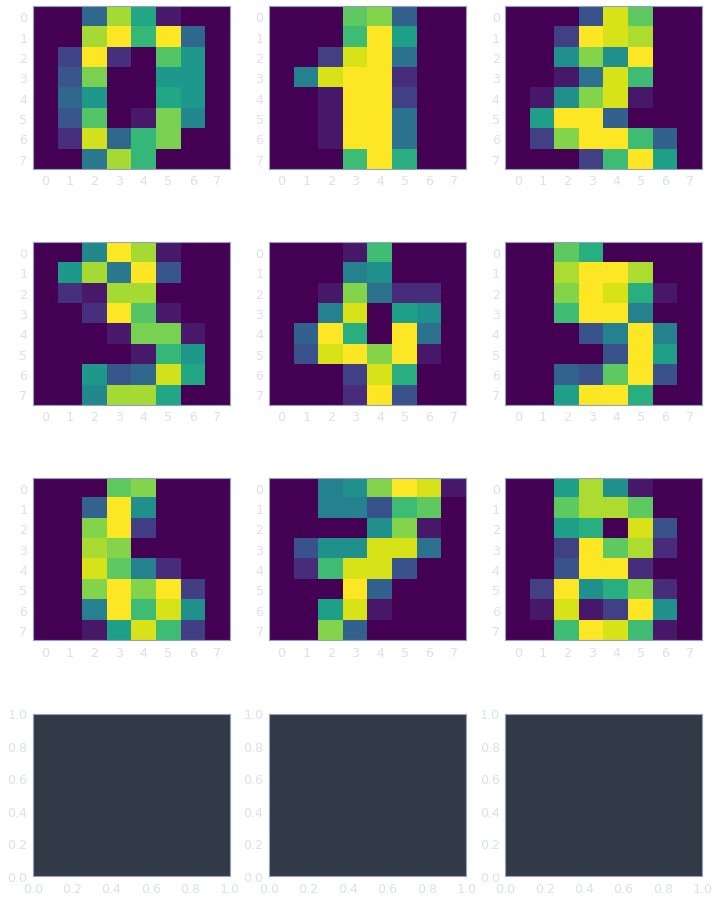

In [19]:
import pymisca.numpy_extra as pynp
X  =tdf.values

for i in range(10):
    Y = X
    Y = pynp.arr__colNorm(Y,axis=1)
#     Y = pynp.arr__rowNorm(Y)
    print ((X - Y)**2).mean()
    X = Y
    
L = 9
fig,axs = pyvis.get_subplotGrid(L=L,ncols=3)
for i in range(L):
    pyvis.heatmap(X[i].reshape((8,8)),ax=axs[i])    


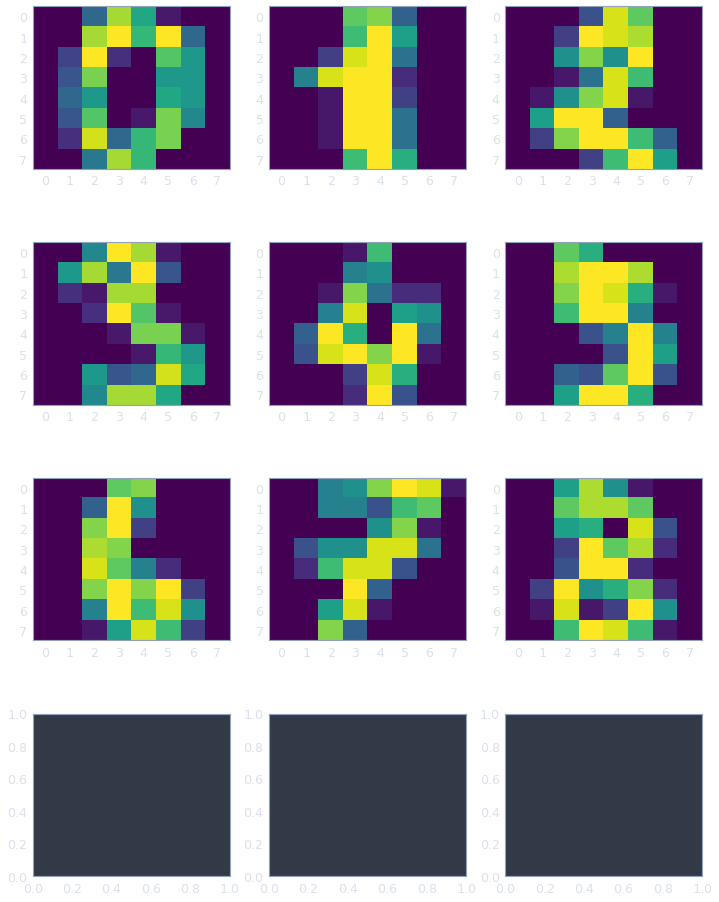

In [16]:
# for i in range(10):
X  =tdf.values
Y = X
Y = pynp.arr__rowNorm(Y)
Y = pynp.arr__colNorm(Y)

L = 9
fig,axs = pyvis.get_subplotGrid(L=L,ncols=3)
for i in range(L):
    pyvis.heatmap(X[i].reshape((8,8)),ax=axs[i])

In [19]:
import funcy
funcy

In [141]:
np.random.set_state(np.random.get_state())

In [243]:
import pymisca.numpy_extra as pynp
# import pymisca.nor

import mixem


import pymisca.models as pymod
import numpy as np
reload(pymod)
K = 30
D = 64
# concentration = 
eta= 10.


tdfc = pynp.arr__sumNorm(tdf.values,axis=1)

D = len(tdfc.T)


nIter = 200
start = 200
end = 250
D = 64

# import py
def vmfMixture__anneal(data,start,end,
                       K = 30,
                       nIter=200,
                       verbose=1):
    D = data.shape[1]
    # betas = np.linspace(0,1000,nIter)
    betas = np.linspace(start,end,nIter)
    callback = pycbk.callback__stopAndTurn(
        betas=betas)

    mdl = mdl0 = pymod.EMMixtureModel(
        dists=[pymod.vmfDistribution(D=D) for i in range(K)]
        ).random_init()

    hist = mdl.fit(X=tdfc,verbose=3,
                   max_iters=nIter,min_iters = nIter,
                   callback=callback,

    #                callback=lambda *x:pyext.sys.stdout.write(str(x))
                  )
    mdl.hist  = hist
    return mdl

# tdfc = pynp.arr__sumNorm(tdf.values,axis=1)
# mdl0 = vmfMixture__anneal(tdfc,200,250)
# m0 = mdl
# clu = mdl.predictClu(
# #     tdfc - tdfc.mean(axis=1,keepdims=1)
# #                     )
# pyutil.get_cluCount(clu)

# dists = 
# mixem.em(distributions=dists)

In [253]:
reload(pyjob)

<module 'pymisca.jobs' from '/home/feng/.local/lib/python2.7/site-packages/pymisca/jobs.pyc'>

[cbk]iter=0: beta=1.000E+02                         Cluster multiplexing
[iter]0,                    log_likelihood=-4.97
[iter]10,                    log_likelihood=31579.48
[iter]20,                    log_likelihood=33916.02
[iter]30,                    log_likelihood=37275.49
[iter]40,                    log_likelihood=40743.66
[iter]50,                    log_likelihood=43512.15
[iter]60,                    log_likelihood=46217.47
[iter]70,                    log_likelihood=48889.24
[iter]80,                    log_likelihood=51576.67
[iter]90,                    log_likelihood=54164.55
[iter]100,                    log_likelihood=56735.00
[iter]110,                    log_likelihood=59356.11
[iter]120,                    log_likelihood=61953.55
[iter]130,                    log_likelihood=64580.90
[iter]140,                    log_likelihood=67147.99
[iter]150,                    log_likelihood=69709.22
[iter]160,                    log_likelihood=72296.44
[iter]170,             

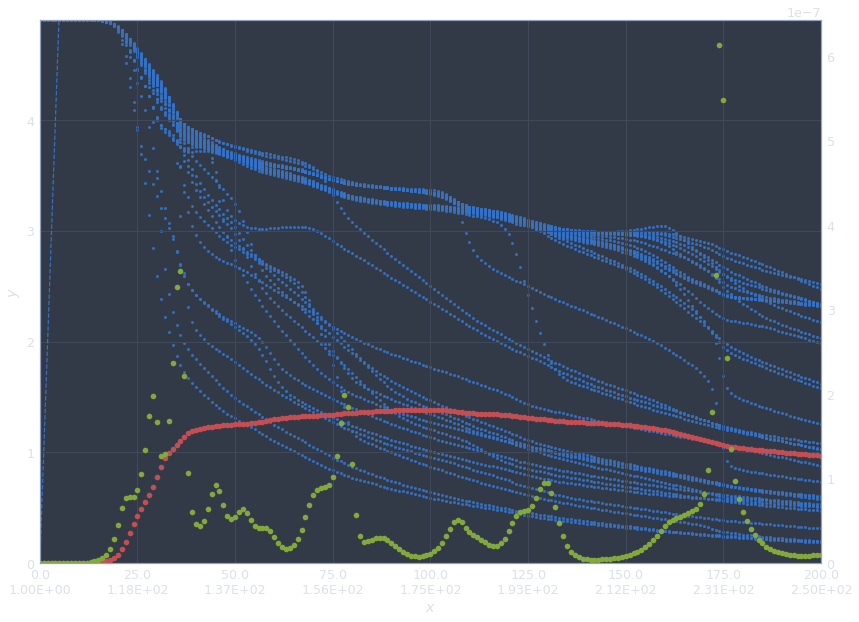

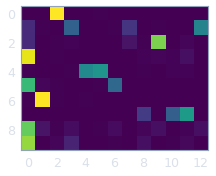

In [254]:
tdfc = pynp.arr__sumNorm(tdf.values,axis=1)
mdl0 = pyjob.vmfMixture__anneal(tdfc,100, 250,K =30)
pycbk.qc__vmf__speed(mdl0)

mdl = mdl0.callback.mdls[75][-1]
clu = mdl.predictClu(tdfc,
                     entropy_cutoff = 2.2
                    )
pyutil.get_cluCount(clu)
cmat = pyvis.getConfusionMat(y_pred=clu.values.ravel(),y_true=y_true)
pyvis.heatmap(cmat)

In [255]:
tdfc = pynp.arr__sumNorm(tdf.values,axis=1)
tdfc = np.sqrt(tdfc)
mdl0 = pyjob.vmfMixture__anneal(tdfc,20, 80, K=30)


[cbk]iter=0: beta=2.000E+01                         Cluster multiplexing
[iter]0,                    log_likelihood=20.13
[iter]10,                    log_likelihood=35267.61
[iter]20,                    log_likelihood=39950.58
[iter]30,                    log_likelihood=44728.17
[iter]40,                    log_likelihood=51231.16
[iter]50,                    log_likelihood=57102.87
[iter]60,                    log_likelihood=62588.27
[iter]70,                    log_likelihood=68000.79
[iter]80,                    log_likelihood=73345.18
[iter]90,                    log_likelihood=78582.39
[iter]100,                    log_likelihood=83824.49
[iter]110,                    log_likelihood=89112.73
[iter]120,                    log_likelihood=94449.95
[iter]130,                    log_likelihood=99694.05
[iter]140,                    log_likelihood=104922.47
[iter]150,                    log_likelihood=110144.27
[iter]160,                    log_likelihood=115364.36
[iter]170,          

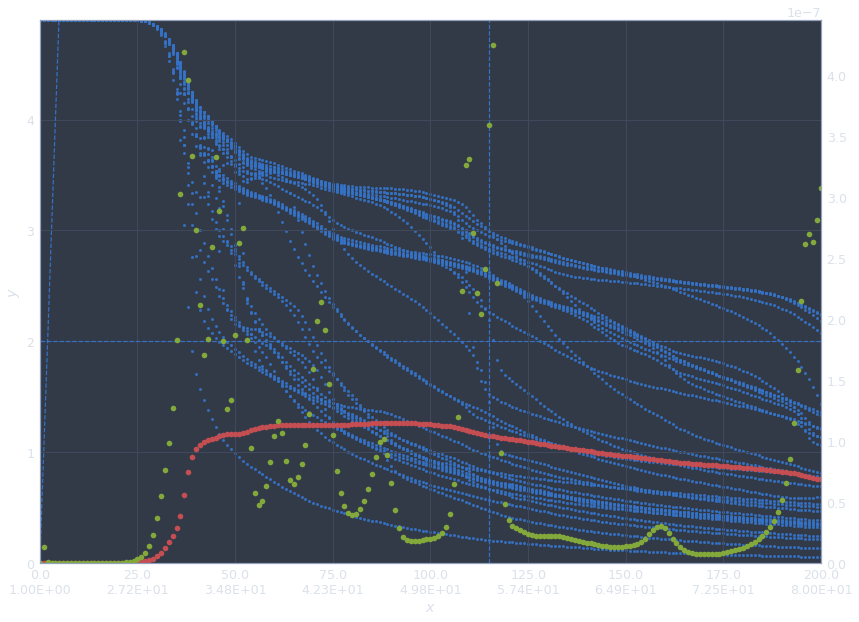

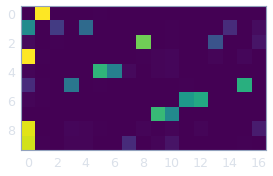

In [256]:
XCUT =STEP = 115
YCUT = 2.0
pycbk.qc__vmf__speed(mdl0,XCUT=XCUT,YCUT=YCUT)
mdl = mdl0.callback.mdls[STEP][-1]
clu = mdl.predictClu(tdfc,
                     entropy_cutoff = YCUT
                    )
pyutil.get_cluCount(clu)
cmat = pyvis.getConfusionMat(y_pred=clu.values.ravel(),y_true=y_true)
pyvis.heatmap(cmat)

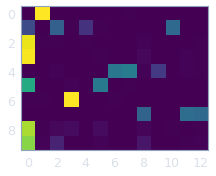

In [239]:
mdl = mdl0.callback.mdls[75][-1]
clu = mdl.predictClu(tdfc,
                     entropy_cutoff = 2.2
                    )
pyutil.get_cluCount(clu)
cmat = pyvis.getConfusionMat(y_pred=clu.values.ravel(),y_true=y_true)
pyvis.heatmap(cmat)

In [70]:
res =_ 

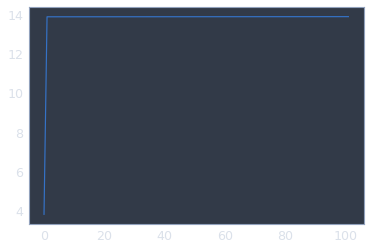

In [154]:
%matplotlib inline
plt.plot(hist)

In [85]:
# 
# clu = p

In [151]:
pyvis.heatmap(mdl.dists[6].mean.reshape((8,8)))

AttributeError: 'vmfDistribution' object has no attribute 'mean'

In [155]:
clu = mdl.predictClu(tdfc)
pyutil.get_cluCount(clu)

,clu,count
0,3,1797


In [138]:
import sklearn.decomposition as skdecomp
mdl = skdecomp.LatentDirichletAllocation(n_components=30,learning_method='batch')
mdl.fit(data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=30, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [132]:
mdl.n_components

10

In [129]:
res = mdl.transform(data)

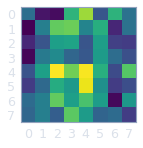

In [136]:
# mdl.topic_word_prior_
# mdl.mean_change_tol
# mdl.total_samples
pyvis.heatmap(mdl.components_[17].reshape((8,8)))

In [139]:
np.histogram(res.argmax(axis=1),np.arange( 1 + mdl.n_components)-0.5)

(array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 899,   0,
        898,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5,
        21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5]))

In [32]:
d = dists[0]
# d.log_pdf??
# d.log_density?

In [95]:
reload(pymod)
data = tdfc
dists = map(randDist,range(K))
mdl = pymod.EMMixtureModel(dists=dists)
# for i in range(10):
# def worker():    
#     for i in range(10):
if 1:
    def step():
        resp = np.zeros((len(data),mdl.K))
        weights = mdl.weights
        for i in range(K):
            d = mdl.dists[i]
            resp[:,i] = d.log_density(data) + mdl.weights[i]
        log_density = resp
#         resp = log_density= mdl.predict_proba(data,log=0,norm=0) * mdl.weights
        SUM = resp.sum(axis=1,keepdims=1)
        print np.sum(np.isnan(resp))
        print np.sum(SUM==0)
        resp = resp / SUM
#         resp = pynp.arr__sumNorm(resp,axis=1)
        sumWeight = resp.sum(axis=0)
        idx_active = sumWeight != 0.
        resp[:, ~ idx_active ] = 0.

        mdl.weights = pynp.arr__sumNorm(resp.sum(axis=0))
        for i in range(K):
            mdl.dists[i].estimate_parameters(data,resp[:,i])
        print 
        log_likelihood = np.sum(( resp[:,idx_active] * log_density[:,idx_active]))  
        for k,v in locals().items():
            if k in ['log_likelihood','d']:
                continue
            isNA = np.any(np.isnan([v]))
            print (k,isNA)
            if isNA:
                assert 0
#                 break
        print log_likelihood
# worker()
# weights = 
# weights = pynp.arr__sumNorm(resp,axis=1)

In [96]:
d = dists[0]

In [42]:
mdl.weights

array([1.])

In [54]:
%pdb 0

Automatic pdb calling has been turned OFF


In [105]:
# reload(pymod)
data = tdfc
dists = map(randDist,range(K))
mdl = pymod.EMMixtureModel(dists=dists)
step()

0
0

('idx_active', False)
('log_density', False)
('SUM', False)
('i', False)
('sumWeight', False)
('weights', False)
('resp', False)
8059096.297517479


In [107]:
step()

17970
0

('idx_active', False)
('log_density', True)


AssertionError: 

In [112]:
# mdl.dists[0].mean

array([0.00000000e+00, 2.00140580e-04, 5.11626208e-03, 2.78721533e-02,
       3.86630439e-02, 1.30675152e-02, 2.39608416e-03, 2.29967799e-04,
       3.47093954e-06, 1.94669194e-03, 1.55431334e-02, 4.23157880e-02,
       2.85002334e-02, 1.37056907e-02, 4.83811392e-03, 7.79544087e-04,
       1.70327841e-06, 3.58405220e-03, 2.98445007e-02, 3.38617822e-02,
       1.63852213e-02, 1.68397881e-02, 7.88947770e-03, 8.08149959e-04,
       1.32707579e-06, 1.09771771e-02, 3.94105376e-02, 2.77643505e-02,
       2.77519221e-02, 2.53366717e-02, 1.02022484e-02, 2.11386092e-05,
       0.00000000e+00, 1.49583217e-02, 3.70707376e-02, 3.57910731e-02,
       4.28846279e-02, 3.98646581e-02, 1.31704826e-02, 0.00000000e+00,
       4.98180575e-05, 8.67441324e-03, 2.56235677e-02, 2.77322930e-02,
       3.21480417e-02, 3.53768761e-02, 1.45442198e-02, 2.51207210e-04,
       1.41281579e-05, 5.49455334e-04, 9.49190860e-03, 2.47811073e-02,
       3.54694255e-02, 2.90351862e-02, 1.39386390e-02, 1.12433275e-03,
      

In [91]:
mdl.dists[4].mean

array([0.00000000e+00, 4.99613294e-04, 1.37850051e-02, 4.00435718e-02,
       4.21020267e-02, 1.89259805e-02, 2.89640515e-03, 1.86229072e-04,
       2.82772180e-05, 9.39435620e-03, 4.28474898e-02, 3.54304064e-02,
       3.17719144e-02, 3.46626332e-02, 5.74124381e-03, 1.59797561e-04,
       5.03749610e-05, 1.79624519e-02, 3.76049099e-02, 1.26204046e-02,
       2.32723441e-02, 3.47914897e-02, 6.25245025e-03, 1.48927568e-05,
       1.94109914e-06, 9.61866922e-03, 2.65070237e-02, 2.46458315e-02,
       3.62812308e-02, 2.95443295e-02, 7.40519952e-03, 7.58767202e-07,
       0.00000000e+00, 3.24752204e-03, 8.57634876e-03, 1.23758708e-02,
       2.52343814e-02, 2.59105552e-02, 1.09649735e-02, 0.00000000e+00,
       2.62650651e-06, 2.01125196e-03, 1.10573969e-02, 1.25647366e-02,
       1.68209618e-02, 2.26240650e-02, 1.72901461e-02, 3.74396276e-05,
       6.78530425e-06, 1.17836445e-03, 2.21413997e-02, 3.07330388e-02,
       2.35040323e-02, 3.07285611e-02, 2.13120198e-02, 1.42863237e-03,
      

In [81]:
resp.sum(axis=0)

array([  33.06114585,    6.05666401, 1046.48147363,   44.74156528,
        150.95113801,  113.69428664,   47.98085503,   13.37805889,
        317.31404684,   23.34076581])

In [39]:
# tdfc.sum(axis=1)a as

array([1., 1., 1., ..., 1., 1., 1.])

In [67]:
dists = map(randDist,range(K))
# dists[1].mean


array([1.66696283e-02, 1.83846760e-02, 1.09113871e-02, 3.20126038e-03,
       2.75613660e-02, 2.87959040e-02, 2.47188503e-02, 1.02915433e-02,
       2.11732853e-02, 8.53854837e-03, 4.52793937e-03, 1.77663748e-02,
       1.67467079e-02, 1.56271580e-02, 2.53194580e-02, 1.26420876e-02,
       2.23175198e-03, 2.34198597e-02, 2.08843727e-02, 1.05321477e-02,
       5.37789651e-03, 1.28881011e-02, 1.59895857e-02, 2.74069960e-02,
       2.78017538e-02, 2.88496673e-02, 1.01923974e-02, 1.76164497e-02,
       2.35099666e-02, 5.31988043e-04, 1.56590770e-02, 1.89458612e-02,
       1.32919345e-02, 4.46523480e-05, 1.35518886e-03, 2.69729334e-02,
       2.47552362e-02, 1.23282202e-02, 2.49946679e-02, 1.73798180e-02,
       1.84762583e-02, 2.23332502e-03, 1.20029515e-03, 2.72863076e-02,
       8.60361614e-03, 1.45284024e-02, 2.51310147e-02, 2.02640595e-02,
       2.51468903e-03, 1.99243183e-03, 1.45614273e-02, 2.21144578e-02,
       1.30364155e-02, 9.93356077e-03, 1.65105792e-02, 8.23093066e-03,
      

In [215]:
np.random.seed(0)
D = 3
N = 1000
xs = np.hstack( [np.zeros((N,1)),np.random.random(size=(N,D-1)),np.ones((N,1))])
xs = np.diff(xs)
def f(xs):
    res = xs.sum(axis=1)
    return res
print f(xs).mean()


def nearestGridAppx(X,D):
# def f(X):
    X = X*D
    Y = (X +0.5 ).astype(int)    
    
    arg = np.argsort((Y - X),axis=1)
    res = Y.sum(axis=1,keepdims=1) 
    diff = (res - D)
    FLAG = (arg < -diff) * (diff < 0) | (diff > 0) * ((arg - D) >= -diff)  
#     FLAG = (arg < diff) * (diff > 0) | (diff < 0) * ((arg - D) >= diff)  
    Y = Y + FLAG * -np.sign(diff)

    return Y
def nearestGridAppx(X,D):
# def f(X):
    X = X*D
#     Y = np.argsort()
    Y = (X +0.5 ).astype(int)    
    diff = (Y - X)
    arg = np.argsort((Y - X),axis=1)
    X = (arg < D//2) * np.floor(X) + (arg>D//2)  * np.ceil(X)
#     X = (arg < D//2) * np.ceil(X) + (arg>D//2)  * np.floor(X)
#     X = X + (arg < D//2) - (arg>D//2) 
#     res = Y.sum(axis=1,keepdims=1) 
#     diff = (res - D)
#     FLAG = (arg < -diff) * (diff < 0) | (diff > 0) * ((arg - D) >= -diff)  
# #     FLAG = (arg < diff) * (diff > 0) | (diff < 0) * ((arg - D) >= diff)  
#     Y = Y + FLAG * -np.sign(diff)

    return X

def f(X):
    Y = nearestGridAppx(X,D=D)
    res = Y.sum(axis=1,keepdims=1) 
#     res = abs(Y - X)
    return res
    
# f = nearestGridAppx
res= f(xs)
print res.mean()
print pyutil.span(f(xs))

1.0
1.614
(0.0, 3.0)


In [160]:
X = xs[np.where(res==-1)[0]]
X 

array([[0.43758721, 0.45418579, 0.108227  ],
       [0.77815675, 0.0918554 , 0.12998785],
       [0.14335329, 0.80131563, 0.05533108],
       [0.45615033, 0.11228362, 0.43156605],
       [0.44712538, 0.39928329, 0.15359133],
       [0.13547406, 0.16280826, 0.70171767],
       [0.43586493, 0.45605843, 0.10807664],
       [0.10022689, 0.81925573, 0.08051739],
       [0.1494483 , 0.71867775, 0.13187394],
       [0.16249293, 0.45306663, 0.38444044],
       [0.12381998, 0.72418825, 0.15199177],
       [0.7220556 , 0.14432673, 0.13361767],
       [0.16469416, 0.45678425, 0.3785216 ],
       [0.49739137, 0.14208115, 0.36052748],
       [0.09784448, 0.76434703, 0.13780848],
       [0.42053947, 0.13682932, 0.44263121],
       [0.43040244, 0.07961441, 0.48998315],
       [0.79639147, 0.16277513, 0.0408334 ],
       [0.45813883, 0.13284534, 0.40901583],
       [0.82076712, 0.0880766 , 0.09115628],
       [0.7307091 , 0.15101111, 0.11827979],
       [0.13128933, 0.47282848, 0.3958822 ],
       [0.

In [161]:
    X = X*D
    Y = (X +0.5 ).astype(int)    
    
#     Y = (X+0.5).astype(int)    
#     dist = D - 
    arg = np.argsort((Y - X),axis=1)
#     Y.sum(axis=)
    res = Y.sum(axis=1,keepdims=1) 
    
    diff = (res - D)
#     np.where(diff.ravel()<0)[0]
    FLAG = arg < diff

In [163]:
diff

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],

In [154]:
pyutil.collections.Counter(f(xs).ravel())

Counter({2: 95, 3: 905})

In [128]:
2**64

18446744073709551616L

(1.0, 5.0)

In [63]:
dists[1].log_density(tdfc)

array([253.98686924, 249.0183875 , 254.69488844, ..., 250.36163613,
       252.31282567, 254.6479035 ])